In [37]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("C:\\Users\\moham\\Downloads\\Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


First Task: Basic Data Exploration

In [38]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 148654
Number of columns: 13


In [39]:
column_datatypes = df.dtypes

print("Data types of each column:")
print(column_datatypes)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [40]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


Second Task: Descriptive Statistics

In [41]:
# Display basic statistics
statistics = df.describe()

# # Calculate median and mode separately
# median_values = df.median()
# mode_values = df.mode().iloc[0]  # Use iloc[0] to get the first mode if there are multiple modes

salary_range = df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min()
standard_deviation = df['TotalPayBenefits'].std()
mean_salary = df['TotalPayBenefits'].mean()
mode_salary = df['TotalPayBenefits'].mode().iloc[0]

# Print the results
print("Basic Statistics:")
print(statistics)

print("\nMinimum Salary:", df['TotalPayBenefits'].min())
print("Maximum Salary:", df['TotalPayBenefits'].max())
print("Range of Salaries:", salary_range)
print("Standard Deviation of Salaries:", standard_deviation)
print("Mean Salary:", mean_salary)
print("Mode Salary:", mode_salary)

Basic Statistics:
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -6

Third Task: Data Cleaning

In this task I have to replace the Null values with a suitable values.
In addition to that, each of the columns Notes and Status have a Null value for all rows, so that I will drop these two columns.

In [42]:
# now I will replace each of the columns: BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits with mean value
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)


In [43]:
# printing missing values again:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [44]:
# dropping rows: Status and Notes:

df.drop('Status', axis=1, inplace=True)
df.drop('Notes', axis=1, inplace=True)

In [45]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


In [46]:
Basic Data VisualizationFourth Task: 

SyntaxError: invalid syntax (3230373409.py, line 1)

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


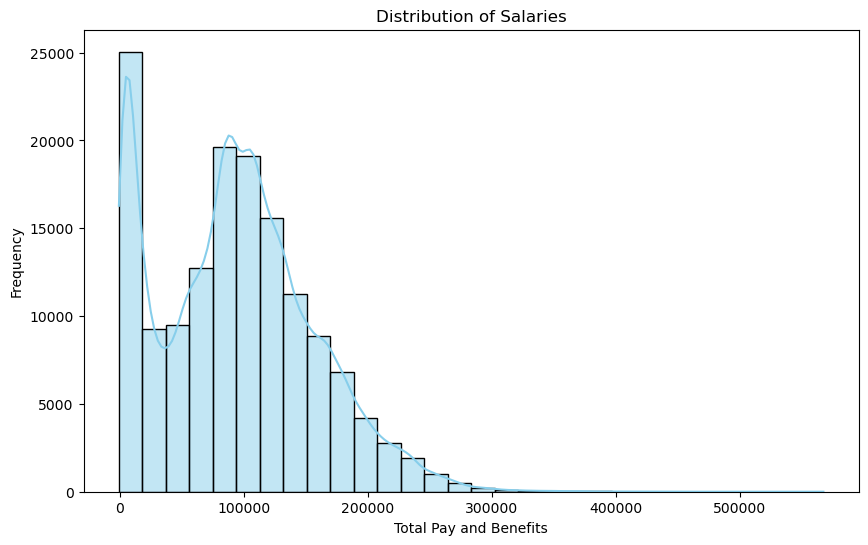

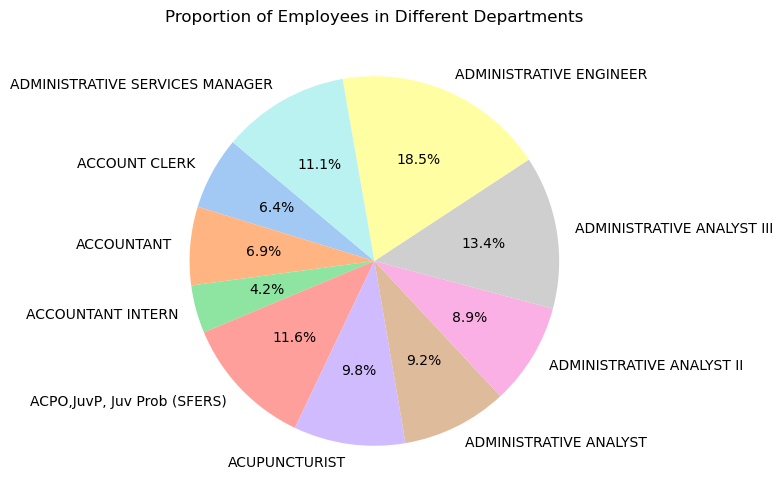

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# viewing the distribution of salaries (using a histogram):
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPayBenefits'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay and Benefits')
plt.ylabel('Frequency')
plt.show()

# viewing the proportion of employees in different departments (using a pie chart)
# department_counts = df['JobTitle'].value_counts().head(10)
department_counts = df.groupby('JobTitle')['TotalPayBenefits'].mean()
department_counts = department_counts.head(10)

plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

Fifth Task: Grouped Analysis

In [48]:
JobTitle_summary = df.groupby('JobTitle')['TotalPayBenefits'].describe()

print("Summary Statistics by Job Title:")
print(JobTitle_summary)

average_salaries_by_job = df.groupby('JobTitle')['TotalPayBenefits'].mean()
sorted_average_salaries = average_salaries_by_job.sort_values(ascending=False)

print("\nAverage Salaries by Job Title:")
print(sorted_average_salaries.head(12000))


Summary Statistics by Job Title:
                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  80266.370000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  69521.123200   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  60118.550000   
ZOO CURATOR                                       1.0  66686.560000   

                                           

Sixth Task: Simple Correlation Analysis

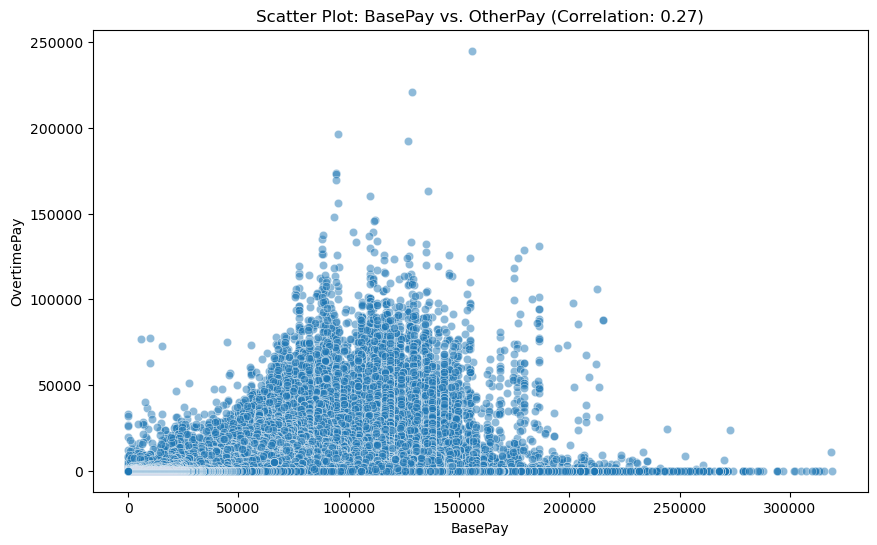

In [49]:
correlation = df['BasePay'].corr(df['OvertimePay'])

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='OvertimePay', data=df, alpha=0.5)
plt.title(f'Scatter Plot: BasePay vs. OtherPay (Correlation: {correlation:.2f})')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()

   As a data set which contains information of an agency salaries through the years 2011-2014 in San Francisco, I found that the average salaries there is 93692, the minimum salaray is -- and the maximum salary is 567595 . In addition to that, the standard deviation is 62793 and the mode is 7959.
   
   Some valurs are not contained in the dataset, like BasePay feature which has 609 lost and Benefits which has 36163 lost. Each of the columns Notes and Status have got no values, so each of the columns has been dropped. About 40000 of salaries ranges from 90000 to 110000, the other salaries distribuites in the two peraphiral ranges 0-90000 and 110000-500000.
   
   From the pie chart that views the portion of the salaries for the first 10 jobs, we can find that the Administrative Engineer has the highest salary, then the Administrative Analist, which has the second top salary, and the Accountant Intern has the lowest salary.

   When grouping salaries depending on Job Titles, I find that the top salary is 436224.360000 which is for the job title: Chief Investment Officer

As a result, the last dataset gives us a comprehensive view of the distribuition of salaries in some agency through the years 2011-2014 in San Francisco.
